# Project 3 - Predicting the Age of Abalone
### Descriptive Analytics

In [12]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

## Data Preprocessing

In [13]:
# Read in unscaled version of the dataset
unscaled_df = pd.read_csv('./Dataset/abalone_unscaled_data.csv')
unscaled_df.head()

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings,Age
0,M,91,73,19,102.8,44.9,20.2,30.0,15,16.5
1,M,70,53,18,45.1,19.9,9.7,14.0,7,8.5
2,F,106,84,27,135.4,51.3,28.3,42.0,9,10.5
3,M,88,73,25,103.2,43.1,22.8,31.0,10,11.5
4,I,66,51,16,41.0,17.9,7.9,11.0,7,8.5


In [14]:
orig_df = unscaled_df.copy()

In [15]:
# Label Encode the categorical "Sex" column
# Note: Female => 0
#       Infant => 1
#       Male   => 2
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
unscaled_df['Sex_LabelEncoded'] = le.fit_transform(unscaled_df['Sex'])
unscaled_df.head()


,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings,Age,Sex_LabelEncoded
0,M,91,73,19,102.8,44.9,20.2,30.0,15,16.5,2
1,M,70,53,18,45.1,19.9,9.7,14.0,7,8.5,2
2,F,106,84,27,135.4,51.3,28.3,42.0,9,10.5,0
3,M,88,73,25,103.2,43.1,22.8,31.0,10,11.5,2
4,I,66,51,16,41.0,17.9,7.9,11.0,7,8.5,1


In [16]:
# Binary encode the categorical "Sex" column
unscaled_df = pd.get_dummies(unscaled_df, prefix=['Sex'], columns=['Sex'])
unscaled_df.head()

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings,Age,Sex_LabelEncoded,Sex_F,Sex_I,Sex_M
0,91,73,19,102.8,44.9,20.2,30.0,15,16.5,2,0,0,1
1,70,53,18,45.1,19.9,9.7,14.0,7,8.5,2,0,0,1
2,106,84,27,135.4,51.3,28.3,42.0,9,10.5,0,1,0,0
3,88,73,25,103.2,43.1,22.8,31.0,10,11.5,2,0,0,1
4,66,51,16,41.0,17.9,7.9,11.0,7,8.5,1,0,1,0


In [17]:
# Reorganize columns
column_order = ["Sex_LabelEncoded", "Sex_M", "Sex_F", "Sex_I", "Length", 
                "Diameter", "Height", "Whole_weight", "Shucked_weight", 
                "Viscera_weight", "Shell_weight", "Rings", "Age"]
unscaled_df = unscaled_df.reindex(columns=column_order)
unscaled_df.head()

,Sex_LabelEncoded,Sex_M,Sex_F,Sex_I,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings,Age
0,2,1,0,0,91,73,19,102.8,44.9,20.2,30.0,15,16.5
1,2,1,0,0,70,53,18,45.1,19.9,9.7,14.0,7,8.5
2,0,0,1,0,106,84,27,135.4,51.3,28.3,42.0,9,10.5
3,2,1,0,0,88,73,25,103.2,43.1,22.8,31.0,10,11.5
4,1,0,0,1,66,51,16,41.0,17.9,7.9,11.0,7,8.5


## Descriptive Analytics

In [18]:
orig_df.describe()

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings,Age
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,104.798420,81.576251,27.903280,165.748432,71.873498,36.118722,47.766172,9.933684,11.433684
std,24.018583,19.847973,8.365411,98.077804,44.392590,21.922850,27.840534,3.224169,3.224169
min,15.000000,11.000000,0.000000,0.400000,0.200000,0.100000,0.300000,1.000000,2.500000
25%,90.000000,70.000000,23.000000,88.300000,37.200000,18.700000,26.000000,8.000000,9.500000
50%,109.000000,85.000000,28.000000,159.900000,67.200000,34.200000,46.800000,9.000000,10.500000
75%,123.000000,96.000000,33.000000,230.600000,100.400000,50.600000,65.800000,11.000000,12.500000
max,163.000000,130.000000,226.000000,565.100000,297.600000,152.000000,201.000000,29.000000,30.500000


In [29]:
# Count of records by Rings
abalone_cnt_by_sex = orig_df[['Rings', 'Length']].groupby('Rings').count().rename(columns={'Length' : 'Record Count'})
abalone_cnt_by_sex 

,Record Count
Rings,
1,1
2,1
3,15
4,57
5,115
6,259
7,391
8,568
9,689


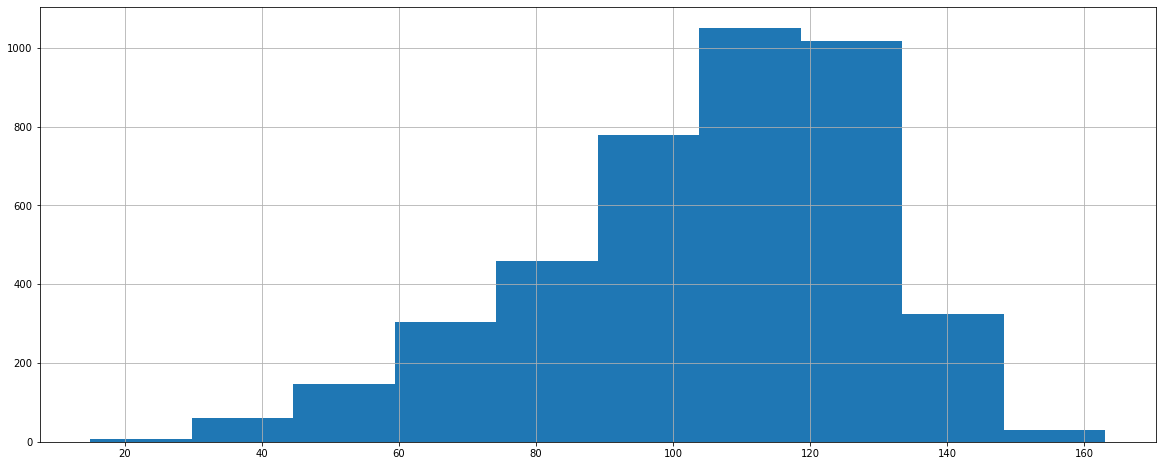

In [24]:
# Histogram of the Length column
orig_df['Length'].hist(figsize=(20,8))

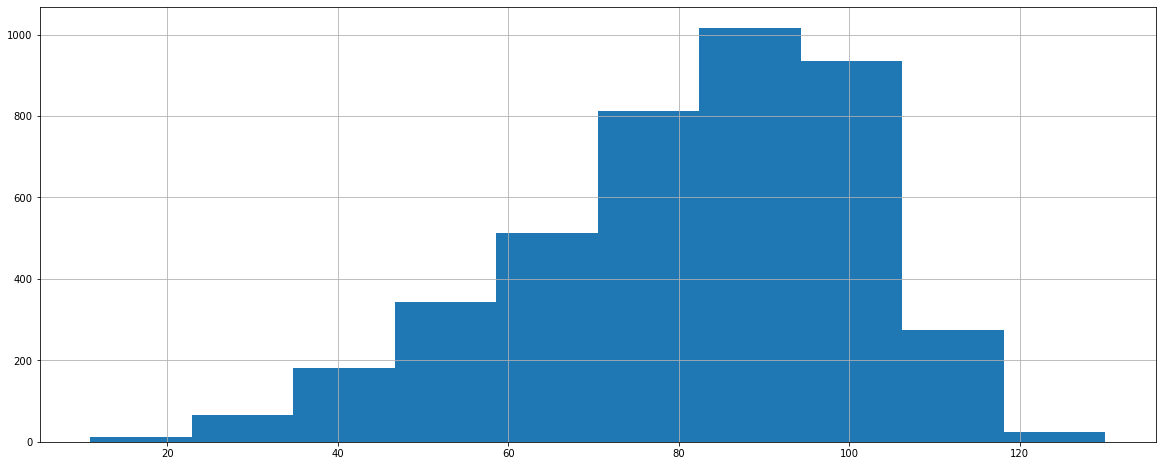

In [25]:
# Histogram of the Diameter column
orig_df['Diameter'].hist(figsize=(20,8))

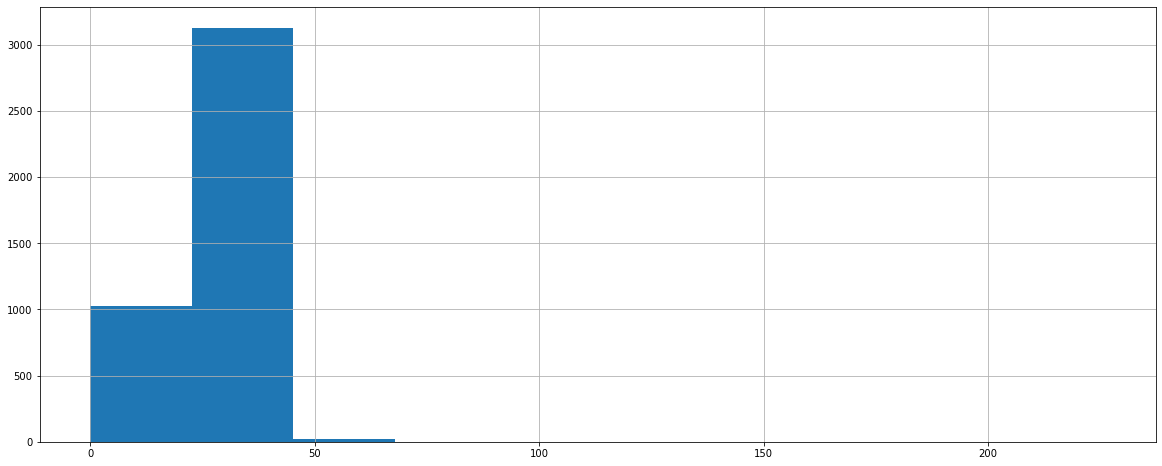

In [26]:
# Histogram of the Height column
orig_df['Height'].hist(figsize=(20,8))

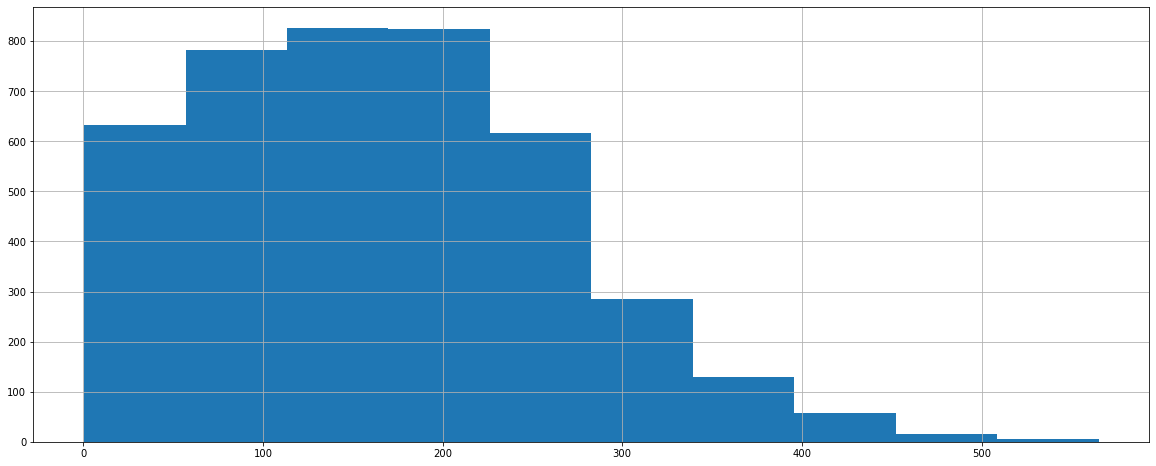

In [27]:
# Histogram of the Whole_weight column
orig_df['Whole_weight'].hist(figsize=(20,8))

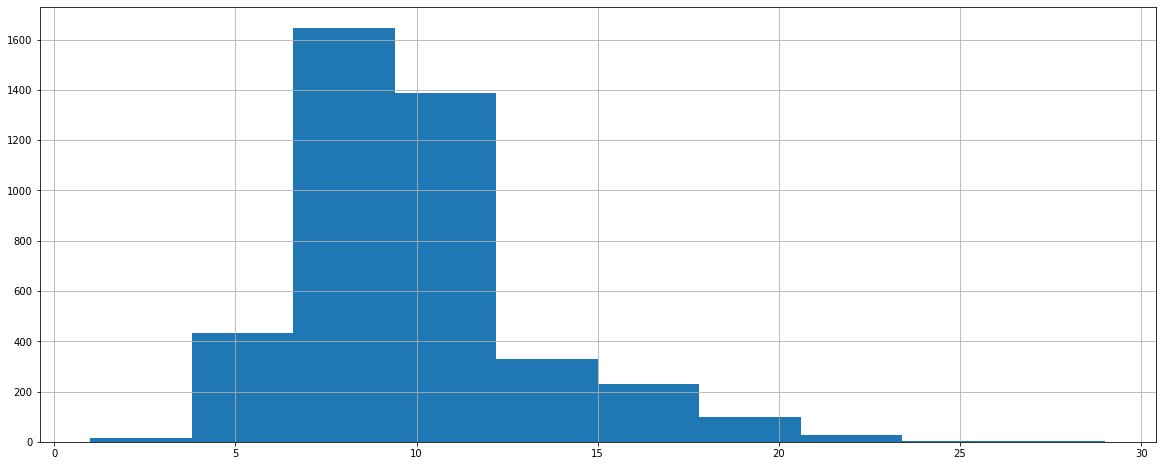

In [28]:
# Histogram of the Rings column
orig_df['Rings'].hist(figsize=(20,8))

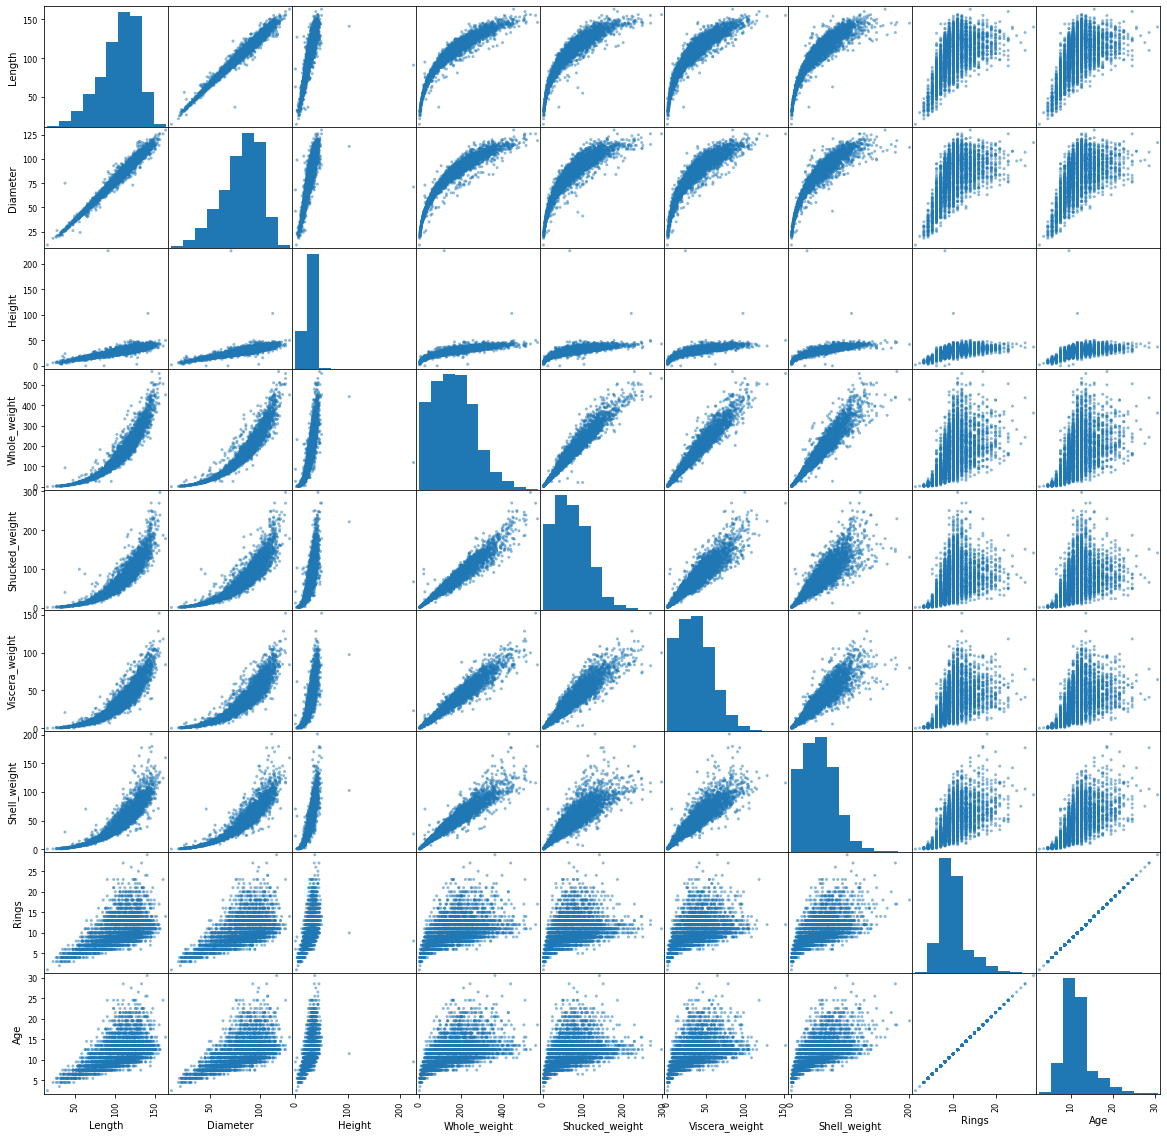

In [21]:
pd.plotting.scatter_matrix(orig_df, figsize = (20, 20));

In [22]:
# Correlation matrix
corr_data_df = unscaled_df.copy()
corr_matrix = corr_data_df.corr().apply(lambda x: round(x, 3))
corr_matrix.style.background_gradient(cmap= 'viridis' , axis=1)\
    .set_properties(**{'max-width': '80px', 'font-size': '12pt'})\
    .set_precision(2)


,Sex_LabelEncoded,Sex_M,Sex_F,Sex_I,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings,Age
Sex_LabelEncoded,1.00,0.88,-0.86,-0.04,-0.04,-0.04,-0.04,-0.02,-0.00,-0.03,-0.04,-0.04,-0.04
Sex_M,0.88,1.00,-0.51,-0.52,0.24,0.24,0.21,0.25,0.25,0.24,0.23,0.18,0.18
Sex_F,-0.86,-0.51,1.00,-0.46,0.31,0.32,0.30,0.30,0.26,0.31,0.31,0.25,0.25
Sex_I,-0.04,-0.52,-0.46,1.00,-0.55,-0.56,-0.52,-0.56,-0.52,-0.56,-0.55,-0.44,-0.44
Length,-0.04,0.24,0.31,-0.55,1.00,0.99,0.83,0.93,0.90,0.90,0.90,0.56,0.56
Diameter,-0.04,0.24,0.32,-0.56,0.99,1.00,0.83,0.93,0.89,0.90,0.91,0.57,0.57
Height,-0.04,0.21,0.30,-0.52,0.83,0.83,1.00,0.82,0.78,0.80,0.82,0.56,0.56
Whole_weight,-0.02,0.25,0.30,-0.56,0.93,0.93,0.82,1.00,0.97,0.97,0.95,0.54,0.54
Shucked_weight,-0.00,0.25,0.26,-0.52,0.90,0.89,0.78,0.97,1.00,0.93,0.88,0.42,0.42
Viscera_weight,-0.03,0.24,0.31,-0.56,0.90,0.90,0.80,0.97,0.93,1.00,0.91,0.50,0.50
